In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt

### Log file (federated learning)

In [75]:
filename = './data/exp_result/iid_10_10_10_32_20210914-192425.pkl'

with open(filename, 'rb') as f:
    iid_data = pickle.load(f)

In [76]:
epochs = len(iid_data['main'])

print('Main logs (epochs): {}'.format(epochs))
iid_te_loss = list()
iid_te_acc = list()
for epoch in range(epochs):
    main_loss, main_acc = iid_data['main'][epoch]
    print('[epoch {:2d}/{:2d}] main_loss: {:0.4f}, main_acc: {:0.4f}'.format(epoch+1, epochs, main_loss, main_acc))
    iid_te_loss.append(main_loss)
    iid_te_acc.append(main_acc)

Main logs (epochs): 10
[epoch  1/10] main_loss: 1.5675, main_acc: 0.8967
[epoch  2/10] main_loss: 1.4939, main_acc: 0.9681
[epoch  3/10] main_loss: 1.4855, main_acc: 0.9763
[epoch  4/10] main_loss: 1.4816, main_acc: 0.9798
[epoch  5/10] main_loss: 1.4788, main_acc: 0.9831
[epoch  6/10] main_loss: 1.4767, main_acc: 0.9853
[epoch  7/10] main_loss: 1.4759, main_acc: 0.9859
[epoch  8/10] main_loss: 1.4746, main_acc: 0.9874
[epoch  9/10] main_loss: 1.4745, main_acc: 0.9869
[epoch 10/10] main_loss: 1.4741, main_acc: 0.9874


In [77]:
local_cnt = len(iid_data['local'])
iter_cnt = len(iid_data['local'][0])
epochs = len(iid_data['local'][0][0])

print('Local logs (local_cnt, iter_cnt, epochs): {}, {}, {}'.format(local_cnt, iter_cnt, epochs), end='\n\n')
for local_idx in range(local_cnt):
    print('### Local_{} ###'.format(local_idx+1))
    for iter_idx in range(iter_cnt):
        print('[*] iter_{}'.format(iter_idx+1))
        for epoch in range(epochs):
            tr_loss, tr_acc, te_loss, te_acc = iid_data['local'][local_idx][iter_idx][epoch]
            print('[epoch {:2d}/{:2d}] train({:0.4f}, {:0.4f}) / test({:0.4f}, {:0.4f})'.format(epoch+1, epochs, tr_loss, tr_acc, te_loss, te_acc))
    print('')

Local logs (local_cnt, iter_cnt, epochs): 10, 10, 10

### Local_1 ###
[*] iter_1
[epoch  1/10] train(2.3023, 0.1137) / test(2.3019, 0.1135)
[epoch  2/10] train(2.3016, 0.1124) / test(2.3010, 0.1135)
[epoch  3/10] train(2.3004, 0.1172) / test(2.2991, 0.1616)
[epoch  4/10] train(2.2956, 0.1951) / test(2.2858, 0.2088)
[epoch  5/10] train(2.1467, 0.3160) / test(1.9261, 0.5863)
[epoch  6/10] train(1.7889, 0.6868) / test(1.6960, 0.7721)
[epoch  7/10] train(1.6938, 0.7730) / test(1.6686, 0.7942)
[epoch  8/10] train(1.6361, 0.8314) / test(1.6186, 0.8474)
[epoch  9/10] train(1.5902, 0.8747) / test(1.5612, 0.9056)
[epoch 10/10] train(1.5596, 0.9043) / test(1.5439, 0.9227)
[*] iter_2
[epoch  1/10] train(2.3023, 0.1166) / test(2.3019, 0.1135)
[epoch  2/10] train(2.3017, 0.1124) / test(2.3011, 0.1135)
[epoch  3/10] train(2.3005, 0.1171) / test(2.2992, 0.1616)
[epoch  4/10] train(2.2954, 0.1998) / test(2.2849, 0.2118)
[epoch  5/10] train(2.1406, 0.3286) / test(1.9458, 0.5412)
[epoch  6/10] train(1.7

### Log file (centralized learning)

In [79]:
filename = './data/exp_result/central_10_32_20210914-190503.pkl'

with open(filename, 'rb') as f:
    central_data = pickle.load(f)

In [80]:
epochs = len(central_data['main'])

print('Main logs (epochs): {}'.format(epochs))
central_te_loss = list()
central_te_acc = list()
for epoch in range(epochs):
    tr_loss, tr_acc, te_loss, te_acc = central_data['main'][epoch]
    print('[epoch {:2d}/{:2d}] train({:0.4f}, {:0.4f}) / test({:0.4f}, {:0.4f})'.format(epoch+1, epochs, tr_loss, tr_acc, te_loss, te_acc))
    central_te_loss.append(te_loss)
    central_te_acc.append(te_acc)

Main logs (epochs): 10
[epoch  1/10] train(1.9573, 0.5119) / test(1.6385, 0.8259)
[epoch  2/10] train(1.5540, 0.9093) / test(1.5034, 0.9589)
[epoch  3/10] train(1.5036, 0.9585) / test(1.5004, 0.9603)
[epoch  4/10] train(1.4964, 0.9655) / test(1.4902, 0.9720)
[epoch  5/10] train(1.4904, 0.9713) / test(1.4866, 0.9748)
[epoch  6/10] train(1.4873, 0.9742) / test(1.4902, 0.9715)
[epoch  7/10] train(1.4850, 0.9762) / test(1.4847, 0.9764)
[epoch  8/10] train(1.4825, 0.9789) / test(1.4791, 0.9822)
[epoch  9/10] train(1.4805, 0.9809) / test(1.4826, 0.9783)
[epoch 10/10] train(1.4792, 0.9821) / test(1.4865, 0.9743)


### Plot (accuracy)

In [98]:
# modes = ['central', 'iid', 'non-iid']
# marker = {'central': 'o', 'iid': '*', 'non-iid': 's'}
# color = {'central': 'blue', 'iid': 'green', 'non-iid': 'red'}
# line = {'central': None, 'iid': ':', 'non-iid': None}
# data = {'central': central_te_acc, 'iid': iid_te_acc, 'non-iid': non_iid_te_acc}

modes = ['central', 'iid']
marker = {'central': 'o', 'iid': '*'}
color = {'central': 'blue', 'iid': 'green'}
line = {'central': None, 'iid': ':'}
data = {'central': central_te_acc, 'iid': iid_te_acc}

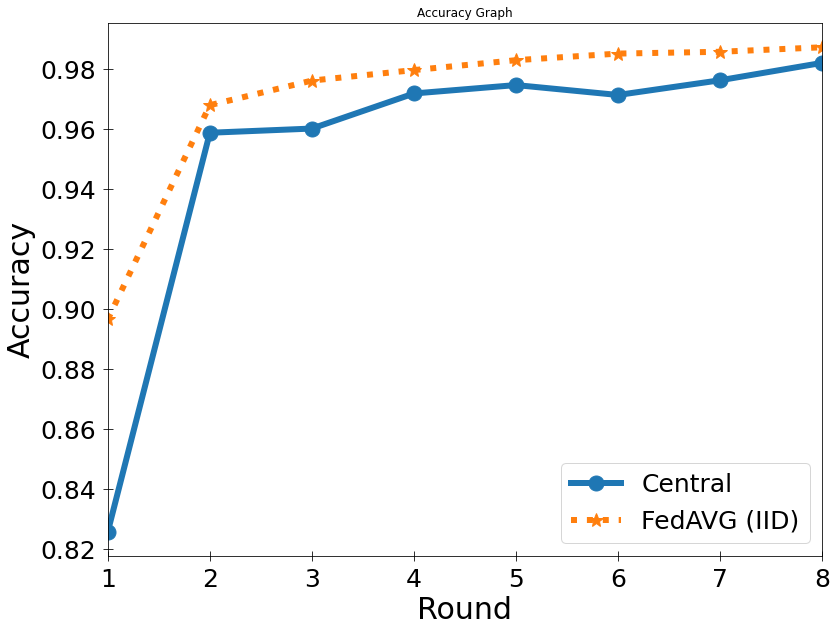

In [101]:
x_values = [x for x in range(1, 9)]

plt.rcParams['figure.figsize'] = (12.8, 9.8)
plt.rcParams['lines.linewidth'] = 6
plt.rcParams['lines.markersize'] = 15
plt.rcParams['axes.labelsize'] = 30

for mode in modes:
    plt.plot(x_values, 
             data[mode][:len(x_values)],
             marker=marker[mode], 
#              color=color[mode],
             linestyle=line[mode]
            )
    
plt.legend(['Central', 'FedAVG (IID)'], loc=4)
plt.xlim(1, x_values[-1])
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.tick_params(axis='both', direction='inout', length=10, pad=7, labelsize=25)
plt.rc('legend', fontsize=25)
plt.savefig('./data/plot/accuracy.png')
plt.title('Accuracy Graph')
plt.show()